# Problem Statement

Lending is one of the critical functions of any bank or financial institution. Customers are provided loans across different products (home loan, loan against property etc.) at competitive interest rates for an acceptable tenure. There is always a risk that a customer may default on the loan or may try and repay the loan in advance which leads to financial losses to the business.  

There may not be enough data or evidence available from the past which will help the firm to predict the loan default or prepayment and mitigate the above possible risk. However, it does have information about the customer demographics, loan details, EMI transactions etc. which contributes to more than 25-30 features (high-dimension data) related to a customer’s loan account. But due to high dimensions it is difficult to identify any patterns within the data. Unsupervised learning techniques like Principal Component Analysis comes to rescue here to reduce the high dimensionality and help in further analysis and pattern recognition. 

## About Data

Data file contains information about the loan transactions done by the customer. 

All important details regarding the loan i.e. loan amount, interest rate, outstanding principal, loan to value ratio (Net LTV), tenure, city where the loan was originated etc. has been provided. 

Some of the features that correspond to multiple loan transactions (e.g. rate of interest, emi amount, frequency of emi payment etc.) for a loan account are summarized and captured for each loan account.

### Import  required libraries

In [ ]:
#!pip install factor_analyzer 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels import multivariate

### Read and view data

In [3]:
df = pd.read_excel('Short Term Home Loans.xlsx')

In [4]:
df.head()

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,...,11,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,...,3,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,...,13,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,...,13,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,...,14,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200


In [5]:
df.shape

(2319, 42)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2319.0,3.945106e+01,8.982396e+00,1.800000e+01,3.200000e+01,3.900000e+01,4.600000e+01,6.500000e+01
gross_income,2319.0,8.260822e+04,1.264007e+05,0.000000e+00,4.189591e+04,6.184963e+04,9.118946e+04,4.261664e+06
nettakehome,2319.0,8.134619e+04,1.268459e+05,0.000000e+00,4.109947e+04,6.050222e+04,9.046402e+04,4.261664e+06
balance_tenure,2319.0,1.466628e+02,4.513873e+01,0.000000e+00,1.290000e+02,1.500000e+02,1.670000e+02,3.070000e+02
completed_tenure,2319.0,2.950367e+01,1.349025e+01,0.000000e+00,2.200000e+01,2.800000e+01,3.700000e+01,7.000000e+01
current_interest_rate,2319.0,1.569870e+01,1.872893e+00,1.107466e+01,1.404621e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_interest_rate_max,2319.0,1.578384e+01,1.832462e+00,1.107466e+01,1.435835e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_interest_rate_min,2319.0,1.568473e+01,1.875045e+00,1.107466e+01,1.404621e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_tenor,2319.0,1.759711e+02,4.224263e+01,1.000000e+01,1.730000e+02,1.800000e+02,1.810000e+02,3.160000e+02
diff_current_interest_rate_max_min,2319.0,1.042883e-01,5.631563e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.201107e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_account                         2319 non-null   object 
 1   age                                  2319 non-null   int64  
 2   gender                               2319 non-null   object 
 3   marital_status                       2319 non-null   object 
 4   qualification                        2319 non-null   object 
 5   gross_income                         2319 non-null   float64
 6   nettakehome                          2319 non-null   float64
 7   balance_tenure                       2319 non-null   int64  
 8   city                                 2319 non-null   object 
 9   completed_tenure                     2319 non-null   int64  
 10  current_interest_rate                2319 non-null   float64
 11  current_interest_rate_max     

In [9]:
df.city.value_counts()

MUMBAI             586
HYDERABAD          268
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
PUNE                78
TIRUCHIRAPPALLI     78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Hyd                 31
Mum                 21
Name: city, dtype: int64

In [10]:
df.gender.value_counts()

M    1994
F     325
Name: gender, dtype: int64

In [11]:
df.marital_status.value_counts()

M    2086
S     233
Name: marital_status, dtype: int64

In [12]:
df.qualification.value_counts()

UG          1548
GRAD         409
POSTGRAD     181
OTHERS       150
PRF           18
ENG            6
MAT            5
DOCTRATE       2
Name: qualification, dtype: int64

#### Observations:


### Data Cleanup

In [13]:
df.city.replace(to_replace='Mum',value='MUMBAI',inplace=True)
df.city.replace(to_replace='Hyd',value='HYDERABAD',inplace=True)
df.city.value_counts()

MUMBAI             607
HYDERABAD          299
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
PUNE                78
TIRUCHIRAPPALLI     78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Name: city, dtype: int64

In [14]:
df.drop(['diff_current_interest_rate_max_min','diff_original_current_interest_rate','diff_original_current_tenor','excess_adjusted_amt'], axis=1, inplace=True)

In [15]:
df.gross_income.replace(to_replace=0, value=df.gross_income.median(),inplace=True)
df.nettakehome.replace(to_replace=0, value=df.nettakehome.median(),inplace=True)

### EDA

#### Univariate Analysis

In [16]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of age
----------------------------------------------------------------------------
count    2319.000000
mean       39.451056
std         8.982396
min        18.000000
25%        32.000000
50%        39.000000
75%        46.000000
max        65.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


C:\Users\guptap6\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


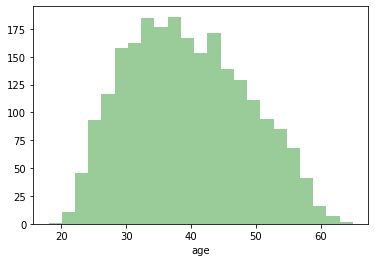

BoxPlot of age
----------------------------------------------------------------------------


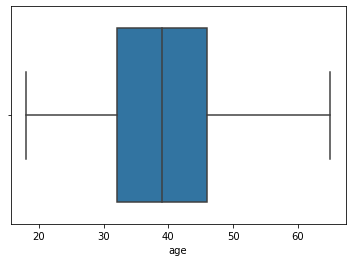

In [17]:
univariateAnalysis_numeric('age',20)

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Observations


In [ ]:
df.num_low_freq_transactions.describe()

In [ ]:
# Probable customers who are paying off their loans earlier
df[df.num_low_freq_transactions > 6]

#### Observation


In [ ]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [ ]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

In [ ]:
lstcatcolumns.remove('loan_account')

In [ ]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

#### Bivariate Analysis

In [ ]:
corr = df_num.corr(method='pearson')

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### Observation



### Outlier Treatment

In [ ]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
no_outlier = ['age','current_interest_rate','current_interest_rate_max','current_interest_rate_min','net_ltv','orignal_interest_rate']

In [ ]:
df_num[no_outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

To treat outliers lets define a function **'treat_outlier'**. 

- For the higher outliers we will treat it to get it at 95 percentile value. 

- Lower level outliers will be treated to get it at 5 percentile value.

In [ ]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [ ]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [ ]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

In [ ]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## PCA

In [ ]:
df_num.info()

In [ ]:
from scipy.stats import zscore
df_num_scaled=df_num.apply()
df_num_scaled.head()

In [ ]:
df_num_scaled.info()

In [ ]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

In [ ]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', )

In [ ]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', )
print('\n')
print('Eigen Vectors \n %s', )

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

### Scree plot

In [ ]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [ ]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=8, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output

In [ ]:
# Loading of each feature on the components
pca.components_

In [ ]:
pca.explained_variance_ratio_

Let's create a dataframe of component loading against each field and identify the pattern

In [ ]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

In [ ]:
df_pca_loading.head(8)

Let's identify which features have maximum loading across the components.



In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [ ]:
df_pca = pd.DataFrame(df_pca,columns=['pc_loan_repayment','pc_balance_loan','pc_interest_rate','pc_tenure',
                                  'pc_pre_emi','pc_emi','pc_receiveable','pc_income'])
df_pca.head()

In [ ]:
df_pca.shape

### EDA (Categorical Fields & Principal Components)

In [ ]:
df_new = pd.concat([df_cat, df_pca], axis=1)

In [ ]:
df_new.shape

In [ ]:
df_new.head()

In [ ]:
df_new.describe(include='all')

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_loan_repayment', data=df_new)

From above plots we observe that for Ahmedabad & Surat the loan repayment amount is comparatively lower than other cities. 

Loan repayment amount is highest for Chennai compared to other cities

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_interest_rate', data=df_new)

Interest rate is highest for Ahmedabad and lowest for Tirupur

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_pre_emi', data=df_new)

City of Erode seems to have highest pre-emi payments

#### Observation

- From above plots we observe that for Ahmedabad city, loan repayment amount is comparatively lower than other cities however, the interest rate charged to the customers is much higher

- For Erode city, loan repayment amount is low, interest rate is comparative high and the pre-emi amount paid by customers from this city is also high

### Apply rules & analyze patterns in data

#### Case 1 - Advance Closure
Customer who 
- has to pay lesser loan, 
- has done some payment as part of pre-emi and 
- has an high income 
have higher chances to do *advance payment* and close the loan in advance thus causing loss to the financial institute

Let's create a subset dataframe *df_adv_closure* which satisfies all above conditions and analyze it further

In [ ]:
cond1 = df_new.pc_loan_repayment < df_new.pc_loan_repayment.quantile(0.25) # customers paying lesser loan
cond2 = df_new.pc_pre_emi > df_new.pc_pre_emi.quantile(0.75) # customers who have paid high pre-emi
cond3 = df_new.pc_income > df_new.pc_income.quantile(0.75) # customers who have high income
df_adv_closure = df_new[cond1 & cond2 & cond3] # Find customers satisifying all above conditions

In [ ]:
df_adv_closure.index

Above index corresponds to the rows or loan accounts which satisfy the Case 1 conditions. Let's create a new field 'advance_closure' which will hold a value of 1 for above indexed rows

In [ ]:
df_adv_closure=df_adv_closure.assign(advance_closure=1)
df_adv_closure.head()

Let's merge *advance_closure* field with our original dataframe for the selected index and analyze further 

In [ ]:
df_merge = df.merge(df_adv_closure['advance_closure'],left_index=True,left_on=df.index, right_index=True, 
                    right_on=df_adv_closure.index, how='left')
df_merge.head(252)

In [ ]:
df_merge.advance_closure.fillna(0, inplace=)

In [ ]:
df_merge.advance_closure.value_counts()

#### Analyze data for probable customers who may payoff the loan in advance

In [ ]:
sns.boxplot(df_merge.advance_closure, df_merge.num_emi_changes)

In [ ]:
sns.boxplot(df_merge., df_merge.outstanding_principal)

In [ ]:
sns.(df_merge.advance_closure, df_merge.paid_interest)

#### Observation:

28 customers have low outstanding principal, have paid less interest so far and we also see that there are more changes in emi value being paid. Hence, there is high probability that these customers may close the loans in advance

#### Case 2 - Loan Default:

Customers 
- with high loan, 
- low income and 
- high loan interest rate 
are probable customers to default.

Let's create a subset dataframe *df_delay_closure* which satisfies all above conditions and analyze further

In [ ]:
cond1 = df_new.pc_loan_repayment > df_new.pc_loan_repayment.quantile(0.75)# customers paying higher loan
cond2 = df_new.pc_income < df_new.pc_income.quantile(0.25) # customers with lesser income
cond3 = df_new.pc_interest_rate > df_new.pc_interest_rate.quantile(0.75) # customers paying higher interest

df_delay_closure = df_new[cond1 & cond2 & cond3]# Find customers satisifying all above conditions

In [ ]:
df_delay_closure.index

Above index corresponds to the rows or loan accounts which satisfy the Case 2 conditions. Let's create a new field *'delay_closure'* which will hold a value of 1 for above indexed rows

In [ ]:
df_delay_closure = df_delay_closure.assign(delay_closure=1)
df_delay_closure.head()

Let's merge the *df_delay_closure* with original dataframe *'df'* and just add the *'delay_closure'* field 

In [ ]:
df_merge = df.merge(df_delay_closure['delay_closure'],left_index=True,left_on=df.index, right_index=True, 
                    right_on=df_delay_closure.index, how='left')
df_merge.head(79)

In [ ]:
df_merge.delay_closure.fillna(0, inplace=True)

In [ ]:
df_merge.delay_closure.value_counts()

#### Analyze data for probable customers who may default

In [ ]:
sns.(df_merge.delay_closure, df_merge.net_ltv)

In [ ]:
sns.boxplot(df_merge., df_merge.outstanding_principal)

In [ ]:
sns.boxplot(df_merge.delay_closure, df_merge.paid_interest)

#### Observation:


### Conclusion

